This is the template for the image recognition exercise. <Br>
Some **general instructions**, read these carefully:
 - The final assignment is returned as a clear and understandable *report*
    - define shortly the concepts and explain the phases you use
    - use the Markdown feature of the notebook for larger explanations
 - return your output as a *working* Jupyter notebook
 - name your file as Exercise_MLPR2023_Partx_uuid.jpynb
    - use the uuid code determined below
    - use this same code for each part of the assignment
 - write easily readable code with comments     
     - if you exploit code from web, provide a reference
 - it is ok to discuss with a friend about the assignment. But it is not ok to copy someone's work. Everyone should submit their own implementation
     - in case of identical submissions, both submissions are failed 

**Deadlines:**
- Part 1: Mon 6.2 at 23:59**
- Part 2: Mon 20.2 at 23:59**
- Part 3: Mon 6.3 at 23:59**

**No extensions for the deadlines** <br>
- after each deadline, example results are given, and it is not possible to submit anymore

**If you encounter problems, Google first and if you can’t find an answer, ask for help**
- Moodle area for questions
- pekavir@utu.fi
- teacher available for questions
    - Monday 30.1 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Monday 13.2 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Thursday 2.3 at lecture 10:15-12:00 

**Grading**

The exercise covers a part of the grading in this course. The course exam has 5 questions, 6 points of each. Exercise gives 6 points, i.e. the total score is 36 points.

From the template below, you can see how many exercise points can be acquired from each task. Exam points are given according to the table below: <br>
<br>
7 exercise points: 1 exam point <br>
8 exercise points: 2 exam points <br>
9 exercise points: 3 exam points <br>
10 exercise points: 4 exam points <br>
11 exercise points: 5 exam points <br>
12 exercise points: 6 exam points <br>
<br>
To pass the exercise, you need at least 7 exercise points, and at least 1 exercise point from each Part.
    
Each student will grade one submission from a peer and their own submission. After each Part deadline, example results are given. Study them carefully and perform the grading according to the given instructions. Mean value from the peer grading and self-grading is used for the final points. 

In [648]:
# import uuid
# # Run this cell only once and save the code. Use the same id code for each Part.
# # Printing random id using uuid1()
# print ("The id code is: ",end="")
# print (uuid.uuid1())

9299e162-ae1f-11ed-a7b1-274065d8b9ff

# Part 1

Read the original research article:

İ. Çınar and M. Koklu. Identification of rice varieties using machine learning algorithms. Journal of Agricultural Sciences, 28(2):307–325, 2022. doi: 10.15832/ankutbd.862482.

https://dergipark.org.tr/en/download/article-file/1513632

## Introduction

Will be written in Part 3

## Preparations of the data (1 p)

Make three folders in your working folder: "notebooks", "data" and "training_data". Save this notebook in "notebooks" folder.
<br> <br>
Perform preparations for the data
- import all the packages needed for this notebook in one cell
- import the images. Data can be found from (downloading starts as you press the link) https://www.muratkoklu.com/datasets/vtdhnd09.php <br>
    - save the data folders "Arborio", "Basmati" and "Jasmine" in "data" folder
- take a random sample of 100 images from Arborio, Basmati and Jasmine rice species (i.e. 300 images in total)
- determine the contour of each rice (you can use e.g. *findContours* from OpenCV)
- plot one example image of each rice species, including the contour

## Feature extraction (2 p)

Gather the feature data <br>
<br>
Color features (15) <br>
- Calculate the following color features for each image, including only the pixels within the contour (you can use e.g. *pointPolygonTest* from OpenCV)
    - Mean for each RGB color channel
    - Variance for each RGB color channel
    - Skewness for each RGB color channel
    - Kurtosis for each RGB color channel
    - Entropy for each RGB color channel
    
Dimension features (6) <br>
- Fit an ellipse to the contour points (you can use e.g. *fitEllipse* from OpenCV)
- Plot one example image of each rice species including the fitted ellipse
- Calculate the following features for each image (for details, see the original article)
    - the major axis length the ellipse
    - the minor axis length of the ellipse
    - area inside the contour (you can use e.g. *contourArea* from OpenCV)
    - perimeter of the contour (you can use e.g. *arcLength* from OpenCV)
    - roundness
    - aspect ratio
    
Gather all the features in one array or dataframe: one data point in one row, including all feature values in columns. <br>
For each data point, include also information of the original image and the label (rice species). Save the data in "training_data" folder.

# Part 2

## Data exploration (2 p)

- Standardize the data
- Plot a boxplot of each feature
- Plot histogram of each feature, use a different color for each class
- Plot pairplot (each feature against each feature and the label against each feature)
- Discuss your findings from the above figures, e.g. can you spot features which might be very useful in predicting the correct class? 
- Fit PCA using two components
- Plot the PCA figure with two components, color the data points according to their species
- Can you see any clusters in PCA? Does this figure give you any clues, how well you will be able to classify the image types? Explain.
- How many PCA components are needed to cover 99% of the variance?
- Make clear figures, use titles and legends for clarification

## Model selection (2 p)

Select the best model for each classifier. Use 5-fold repeated cross validation with 3 repetitions (*RepeatedKFold* from sklearn). You can choose the hyperparameter ranges to use (i.e. from which values the best hyperparameters are selected if they are not stated below.) <br>

- k Nearest Neighbors classifier: hyperparameter k
- random forest: hyperparameters max_depth and max_features
- MLP: use one hidden layer and Early stopping. Hyperparameters:
    - number of neurons in the hidden layer
    - activation function: logistic sigmoid function and rectified linear unit function
    - solver: stochastic gradient descent and adam
    - validation_fraction: 0.1 and 0.5

For each classifier:
- Report the best hyperparameter or the best combination of hyperparameters. <br>
- Plot the accuracy versus the hyperparameter/hyperparameter combination and highlight the best value. <br>

For random forest model, report the feature importance for each feature. Which features seem to be the most important? Does this correspond with the observations you made in the data exploration? <br>
Ponder the model selection process. What things should be considered when selecting the model to be used?

In [649]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mimg
from matplotlib import markers
import os, os.path as path
from scipy.stats import kurtosis, skew, entropy

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import seaborn as sns
from sklearn import metrics

import math




In [650]:
rice_df = pd.read_csv("../training_data/data.csv",index_col=0)

In [651]:
features = list(rice_df.select_dtypes(exclude="object"))
features

['RGB_R_mean',
 'RGB_G_mean',
 'RGB_B_mean',
 'RGB_R_kurtosis',
 'RGB_G_kurtosis',
 'RGB_B_kurtosis',
 'RGB_R_skew',
 'RGB_G_skew',
 'RGB_B_skew',
 'RGB_R_entropy',
 'RGB_G_entropy',
 'RGB_B_entropy',
 'RGB_R_var',
 'RGB_G_var',
 'RGB_B_var',
 'area',
 'perimeter',
 'major_axis_ellipse',
 'minor_axis_ellipse',
 'cx',
 'cy',
 'aspect_ratio']

In [652]:
rice_df.sample(5)

,path,label,RGB_R_mean,RGB_G_mean,RGB_B_mean,RGB_R_kurtosis,RGB_G_kurtosis,RGB_B_kurtosis,RGB_R_skew,RGB_G_skew,...,RGB_G_var,RGB_B_var,contours,area,perimeter,major_axis_ellipse,minor_axis_ellipse,cx,cy,aspect_ratio
144,../data/Jasmine/Jasmine (10588).jpg,Jasmine,89.523404,84.742047,84.957042,-1.685912,-1.682375,-1.682273,0.547664,0.549831,...,12077.701444,12141.384983,../imgs/Jasmine (10588).jpg,5084.0,342.592927,153.501114,44.619980,122.056288,125.762654,2.107692
12,../data/Basmati/basmati (6238).jpg,Basmati,107.637722,103.150642,102.179118,-1.924507,-1.920149,-1.920740,0.229072,0.232359,...,12933.439954,12677.689661,../imgs/basmati (6238).jpg,5860.5,421.002087,195.349609,39.390381,125.442653,121.163240,1.620000
285,../data/Arborio/Arborio (4018).jpg,Arborio,140.676812,137.430351,137.066959,-1.691267,-1.692378,-1.692357,-0.505593,-0.501283,...,11068.852171,11003.225839,../imgs/Arborio (4018).jpg,7217.5,360.977703,130.836990,73.816406,119.995451,120.557164,0.517986
176,../data/Jasmine/Jasmine (14886).jpg,Jasmine,84.571274,83.195762,74.938960,-1.687641,-1.690522,-1.692079,0.541639,0.540687,...,11566.786141,9408.555990,../imgs/Jasmine (14886).jpg,8500.5,442.492422,193.601715,58.023792,126.941160,124.236104,2.833333
170,../data/Jasmine/Jasmine (4625).jpg,Jasmine,146.998120,141.838487,140.251567,-1.540900,-1.542705,-1.542425,-0.651086,-0.647505,...,10124.961586,9916.204579,../imgs/Jasmine (4625).jpg,4919.0,330.475176,142.850616,47.191425,129.192858,119.462797,0.944444


In [653]:
rice_df[features].sample(10)

,RGB_R_mean,RGB_G_mean,RGB_B_mean,RGB_R_kurtosis,RGB_G_kurtosis,RGB_B_kurtosis,RGB_R_skew,RGB_G_skew,RGB_B_skew,RGB_R_entropy,...,RGB_R_var,RGB_G_var,RGB_B_var,area,perimeter,major_axis_ellipse,minor_axis_ellipse,cx,cy,aspect_ratio
30,206.346291,181.674498,181.470454,2.296589,2.108693,2.124330,-2.033651,-1.941360,-1.947363,8.730230,...,6332.233778,5185.224534,5167.207407,7195.0,450.097542,208.363541,46.074959,126.284781,127.760320,1.107143
84,79.705591,76.360626,71.928974,-1.435648,-1.423064,-1.417738,0.740331,0.744766,0.746256,7.849096,...,12478.977069,11547.259563,10231.678016,7480.5,485.487368,233.928696,42.883930,126.747076,121.247399,0.510204
73,160.282399,147.255802,147.378873,-1.523270,-1.520287,-1.519684,-0.660498,-0.652574,-0.653820,8.602227,...,12609.569103,10780.514794,10788.317376,8154.5,464.399056,216.628235,51.262287,128.857645,119.467901,1.114286
56,62.736797,57.563018,57.973902,-0.692484,-0.691393,-0.692099,1.136708,1.137228,1.137072,7.675933,...,11263.007285,9556.565386,9696.062770,8300.0,477.622364,226.712357,49.855503,124.060020,126.444177,0.254717
10,185.757198,166.405085,164.311479,-0.466210,-0.495345,-0.493628,-1.214698,-1.171633,-1.171508,8.742673,...,10234.038517,8421.792780,8226.150893,8209.5,466.055911,218.061905,50.871593,120.028361,120.388737,1.216418
97,57.822295,51.400658,51.554230,-0.436550,-0.411306,-0.413836,1.243354,1.249929,1.249215,7.511545,...,10435.548566,8354.168830,8397.825011,7502.5,478.149276,223.944672,44.232044,123.594957,123.998201,0.307692
258,192.961906,187.892525,188.567875,1.299240,1.262270,1.264472,-1.745481,-1.729203,-1.729690,8.782072,...,6851.635805,6618.973788,6657.937761,7797.5,374.090400,141.492508,70.844620,123.833387,122.626269,0.795276
291,142.747228,139.021925,139.958190,-1.772636,-1.772052,-1.772093,-0.439706,-0.434468,-0.434981,8.487977,...,12798.556501,12237.975045,12397.076136,8009.0,376.936072,144.261703,74.376328,125.519166,124.282599,1.945946
109,145.336950,137.756710,136.498953,-1.744669,-1.745249,-1.745798,-0.475530,-0.475988,-0.475275,8.113176,...,12605.262821,11396.290325,11226.321958,5399.5,349.261973,154.799774,47.097790,126.315369,125.012717,0.692913
83,56.852805,53.646200,53.385164,-0.639938,-0.631511,-0.630059,1.159241,1.161617,1.161778,7.382951,...,9365.992771,8395.837653,8289.397450,6220.5,434.551296,204.449692,39.351948,123.260885,124.817190,0.246154


In [654]:
scaler = StandardScaler()

rice_df[features] = scaler.fit_transform(rice_df[features])

rice_df.sample(10)


,path,label,RGB_R_mean,RGB_G_mean,RGB_B_mean,RGB_R_kurtosis,RGB_G_kurtosis,RGB_B_kurtosis,RGB_R_skew,RGB_G_skew,...,RGB_G_var,RGB_B_var,contours,area,perimeter,major_axis_ellipse,minor_axis_ellipse,cx,cy,aspect_ratio
78,../data/Basmati/basmati (610).jpg,Basmati,1.923439,1.551334,1.599516,1.142929,1.191144,1.211189,-1.793535,-1.792081,...,-2.137065,-2.107860,../imgs/basmati (610).jpg,-0.423219,0.430998,0.765717,-1.070138,1.279002,0.684133,-0.399190
89,../data/Basmati/basmati (8616).jpg,Basmati,-1.391266,-1.406023,-1.383900,-0.133742,-0.116638,-0.117525,1.261214,1.285072,...,0.318042,0.325051,../imgs/basmati (8616).jpg,0.710070,1.144323,1.066987,-0.531751,-0.072686,0.463151,-1.164496
299,../data/Arborio/Arborio (13898).jpg,Arborio,0.511908,0.721750,0.759949,-0.243258,-0.250534,-0.253267,-0.299685,-0.309206,...,0.738342,0.925175,../imgs/Arborio (13898).jpg,1.580928,0.010787,-0.460867,1.879587,0.114267,0.202268,-0.787361
213,../data/Arborio/Arborio (6948).jpg,Arborio,0.949583,0.931764,0.951793,-0.019135,-0.014527,-0.013812,-0.669832,-0.686738,...,-0.432505,-0.343330,../imgs/Arborio (6948).jpg,1.129005,-0.094669,-0.619734,1.707389,0.072096,-0.121363,0.167734
298,../data/Arborio/Arborio (13824).jpg,Arborio,0.334747,0.441158,0.452099,-0.289143,-0.298806,-0.302329,-0.191102,-0.200618,...,0.534960,0.636039,../imgs/Arborio (13824).jpg,0.339515,-0.687324,-0.983097,1.536828,-1.071120,-1.100400,0.664719
77,../data/Basmati/basmati (4060).jpg,Basmati,0.029006,-0.169809,-0.139377,-0.382683,-0.392491,-0.397815,0.225618,0.231484,...,0.656625,0.800711,../imgs/basmati (4060).jpg,0.577022,1.317311,1.064855,-0.594935,-1.007960,0.899159,0.247672
52,../data/Basmati/basmati (9959).jpg,Basmati,0.977773,0.614243,0.642039,-0.167738,-0.172206,-0.173570,-0.463918,-0.446249,...,-0.211625,-0.108264,../imgs/basmati (9959).jpg,0.607077,1.120719,1.211502,-0.618786,0.721368,0.409305,-0.594578
265,../data/Arborio/Arborio (12964).jpg,Arborio,1.761888,1.805848,1.803488,1.704810,1.768296,1.801871,-2.103460,-2.107460,...,-2.409211,-2.434682,../imgs/Arborio (12964).jpg,1.058266,-0.254951,-0.784284,1.822785,-0.730471,1.243896,-0.297727
208,../data/Arborio/Arborio (8852).jpg,Arborio,0.421384,0.565888,0.590545,-0.330801,-0.342975,-0.347064,-0.061697,-0.070322,...,1.525302,1.715937,../imgs/Arborio (8852).jpg,0.127298,-0.516196,-0.849561,0.896106,-1.711581,0.029069,0.529813
236,../data/Arborio/Arborio (5557).jpg,Arborio,0.952385,1.012284,1.017353,0.037273,0.041808,0.043809,-0.762465,-0.772215,...,-0.550805,-0.494811,../imgs/Arborio (5557).jpg,0.356009,-0.372990,-0.643340,0.887343,0.375738,-0.686879,-0.621934


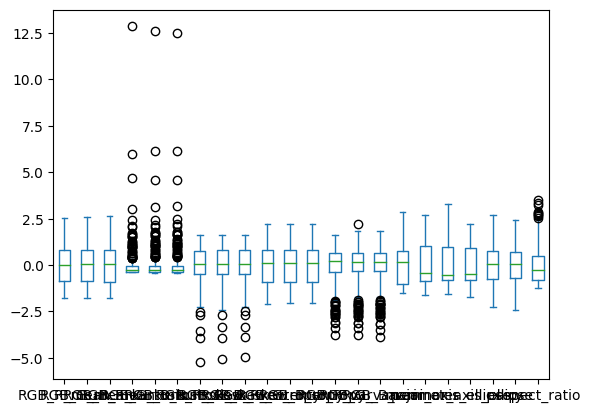

In [655]:
ax = rice_df[features].plot.box()    


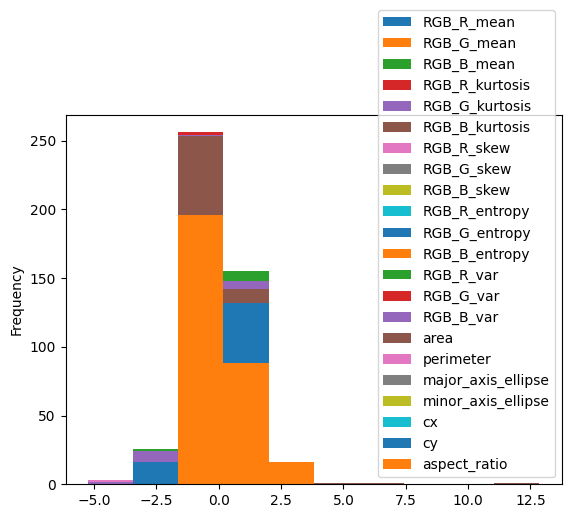

In [656]:
ax = rice_df[features].plot.hist() 

In [657]:
# sns.pairplot(rice_df[features])

Discuss your findings from the above figures, e.g. can you spot features which might be very useful in predicting the correct class? 

In [658]:
pca = PCA(n_components=2)
rice_pca = pca.fit_transform(rice_df[features])
pca.explained_variance_ratio_.cumsum()

array([0.52429976, 0.66296196])

In [659]:
rice_df.shape

(300, 25)

In [660]:
labels = list(rice_df["label"].unique())
color =list(map(lambda x: labels.index(x) ,list(rice_df["label"])  ))


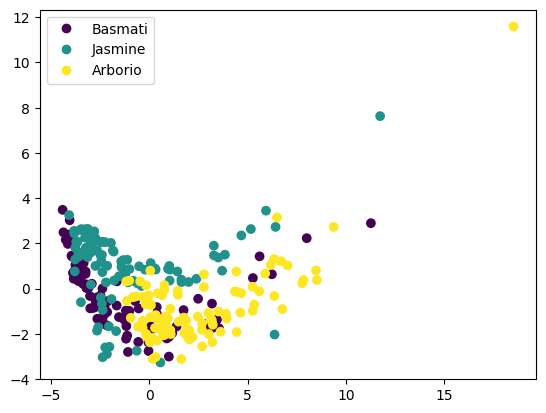

In [661]:
fig = plt.scatter(rice_pca[:,0], rice_pca[:,1],c=color, )
plt.legend(handles=fig.legend_elements()[0], labels=list(labels))

In [662]:
exp_var = []
for i in range(1,len(features)+1):
    pca = PCA(n_components=i)
    rice_pca = pca.fit_transform(rice_df[features])
    if pca.explained_variance_ratio_.cumsum()[-1] >=0.99:
        exp_var.append(i)


print(f"The First {exp_var[0]} explain 99% variance.")

The First 8 explain 99% variance.


In [663]:
cv = RepeatedKFold(n_splits=5, n_repeats=3)

In [664]:
param_grid = dict(n_neighbors=range(1, 11))
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, cv=cv, param_grid=param_grid )
grid.fit(rice_df[features], list(rice_df["label"]))
grid.best_params_

{'n_neighbors': 3}

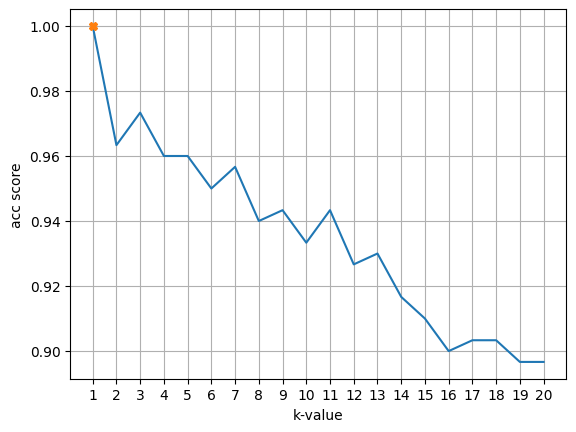

In [665]:
# Trying different k-values (0-20)
accuracies = []
for k in range(1,21):
    train_knn = KNeighborsClassifier(n_neighbors=k) #define the model
    train_knn.fit(rice_df[features], list(rice_df["label"])) #train/fit model and data
    predictions_knn = train_knn.predict(rice_df[features]) #predictions

    #print(metrics.confusion_matrix(testing_labels, predictions_knn)) #print confusion matrix with labels_train vs. the predictions
    acc = metrics.accuracy_score(list(rice_df["label"]), predictions_knn) #get accuracy score
    #print("accuracy:",acc) #print accuracy score
    accuracies.append(acc)

plt.plot(range(1,21),accuracies,)
plt.ylabel('acc score')
plt.xlabel('k-value')
plt.xticks(range(1,21))
plt.grid()
mark = accuracies.index(max(accuracies)) 
plt.plot(mark + 1, accuracies[mark],marker="X")

In [666]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 110, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [667]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, cv=cv, param_grid=param_grid )
grid.fit(rice_df[features], list(rice_df["label"]))
grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 98}

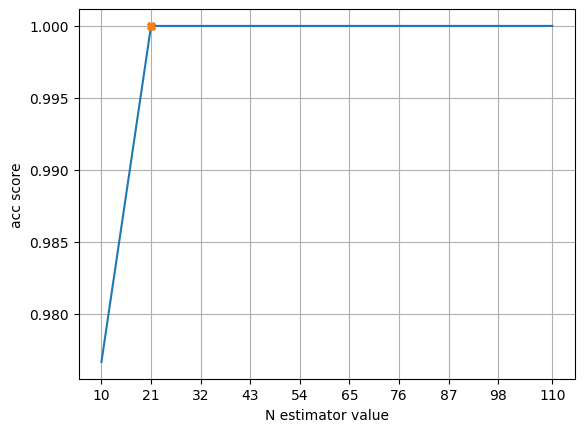

In [668]:
accuracies = []
for k in [int(x) for x in np.linspace(start = 1, stop = 110, num = 10)]:
    train_rf = RandomForestClassifier(n_estimators=k, max_features="sqrt",) #define the model
    train_rf.fit(rice_df[features], list(rice_df["label"])) #train/fit model and data
    predictions_rf = train_rf.predict(rice_df[features]) #predictions

    #print(metrics.confusion_matrix(testing_labels, predictions_knn)) #print confusion matrix with labels_train vs. the predictions
    acc = metrics.accuracy_score(list(rice_df["label"]), predictions_rf) #get accuracy score
    #print("accuracy:",acc) #print accuracy score
    accuracies.append(acc)
x = [int(x) for x in np.linspace(start = 10, stop = 110, num = 10)]
plt.plot(x,accuracies)
plt.ylabel('acc score')
plt.xlabel('N estimator value')
plt.xticks([int(x) for x in np.linspace(start = 10, stop = 110, num = 10)])
plt.grid()
mark = accuracies.index(max(accuracies)) 
plt.plot(x[mark], accuracies[mark],marker="X")

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [669]:
param_grid = {
    'activation': ["relu", "logistic"],
    'solver': ["sgd", "adam"],
    'validation_fraction': [0.1, 0.5],
}


In [670]:
mlp = MLPClassifier(hidden_layer_sizes=1, early_stopping=True)
grid = GridSearchCV(mlp, cv=cv, param_grid=param_grid)
grid.fit(rice_df[features], list(rice_df["label"]))
grid.best_params_


{'activation': 'relu', 'solver': 'adam', 'validation_fraction': 0.1}

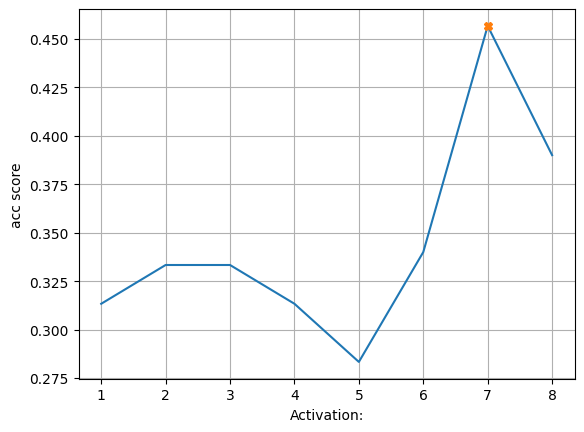

In [671]:
accuracies = []
for activation in param_grid["activation"]:
    for solver in param_grid["solver"]:
        for validation_fraction in param_grid["validation_fraction"]:
            train_mlp = MLPClassifier(hidden_layer_sizes=1, early_stopping=True, activation=activation, solver=solver, validation_fraction=validation_fraction) #define the model
            train_mlp.fit(rice_df[features], list(rice_df["label"])) #train/fit model and data
            predictions_mlp = train_mlp.predict(rice_df[features]) #predictions

            #print(metrics.confusion_matrix(testing_labels, predictions_knn)) #print confusion matrix with labels_train vs. the predictions
            acc = metrics.accuracy_score(list(rice_df["label"]), predictions_mlp) #get accuracy score
            #print("accuracy:",acc) #print accuracy score
            accuracies.append(acc)
x = range(1,len(accuracies)+1)
plt.plot(x,accuracies)
plt.ylabel('acc score')
plt.xlabel(f'Activation:')
plt.xticks(range(1,21))
plt.grid()
mark = accuracies.index(max(accuracies)) 
plt.plot(mark + 1, accuracies[mark],marker="X")